In [1]:
import nltk
import numpy as np #for arrays and matrix manipulcation
import pandas as pd #for reading data and managing dataframes

#for text preprocessing
from nltk.stem import SnowballStemmer #for stemming
from nltk import word_tokenize #for tokenization
from nltk.corpus import stopwords #for getting stop words
import nltk
import re #for regular expression

#For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer #for n-grams
from sklearn.feature_extraction.text import TfidfTransformer # for tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer #for tf-idf

In [38]:
#load the dataset
df1 = pd.read_csv('kundenanfragen-daten-en-1.txt')
df1

,text-de,class,text-en,class-formatted,class-en
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen,I would like more information about your smart...,Produktanfragen,Product Enquiries
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen,"Hello, I'm interested in your pieces of furnit...",Produktanfragen,Product Enquiries
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen,"Dear team, is there a guarantee for the electr...",Produktanfragen,Product Enquiries
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen,Can you provide me with customer reviews for t...,Produktanfragen,Product Enquiries
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen,"Hello, how does the right of return for the pr...",Produktanfragen,Product Enquiries
...,...,...,...,...,...
894,"Bieten Sie hier Beratungsdienste an?""",Allgemeine Anfrage,"Do you offer advisory services here?""",Allgemeine_Anfrage,General request
895,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage,General request
896,"Bieten Sie hier individuelle Anpassungen an?""",Allgemeine Anfrage,"Do you offer individual adjustments here?""",Allgemeine_Anfrage,General request
897,"Könnten Sie mir darüber Auskunft geben?""",Allgemeine Anfrage,"Could you tell me about it?""",Allgemeine_Anfrage,General request


In [39]:
# checking data type of the observations
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text-de          899 non-null    object
 1   class            899 non-null    object
 2   text-en          899 non-null    object
 3   class-formatted  899 non-null    object
 4   class-en         899 non-null    object
dtypes: object(5)
memory usage: 35.2+ KB


In [40]:
# get a descriptive statistical summary of the dataframe.
df1.describe().T

,count,unique,top,freq
text-de,899,297,"Könnten Sie mir darüber Auskunft geben?""",31
class,899,5,Reklamationen,202
text-en,899,290,"Could you tell me about it?""",31
class-formatted,899,5,Reklamationen,202
class-en,899,5,Complaints,202


#### Checking for duplicated values

In [41]:
# check for duplicate values in dataframe
df1.duplicated().sum()

602

#### Check for Null values

In [42]:
df1.isna().sum().sort_values(ascending=True)

text-de            0
class              0
text-en            0
class-formatted    0
class-en           0
dtype: int64

In [43]:
df2 = pd.read_csv("kundenanfragen-daten2.txt", delimiter="-", names=['text-en', 'class-en'])
df2

,text-en,class-en
0,"Hi there, I'm having trouble setting up my new...",Technical Support
1,I'm interested in purchasing one of your produ...,Product inquiries
2,"I received my order today, but the packaging s...",Complaint
3,How long does it usually take for orders to be...,Product inquiries
4,I accidentally placed the wrong order. Can I c...,Order inquiries
...,...,...
505,"I received an email about a promotion, but the...",General inquiries
506,I'm interested in upgrading my subscription. C...,Product inquiries
507,I need assistance with troubleshooting a techn...,Technical support
508,"I'm considering purchasing your product, but I...",Product inquiries


In [44]:
df2.isna().sum()

text-en     0
class-en    0
dtype: int64

In [45]:
df_combined = pd.concat([df1,df2], ignore_index=True)
df_combined

,text-de,class,text-en,class-formatted,class-en
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen,I would like more information about your smart...,Produktanfragen,Product Enquiries
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen,"Hello, I'm interested in your pieces of furnit...",Produktanfragen,Product Enquiries
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen,"Dear team, is there a guarantee for the electr...",Produktanfragen,Product Enquiries
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen,Can you provide me with customer reviews for t...,Produktanfragen,Product Enquiries
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen,"Hello, how does the right of return for the pr...",Produktanfragen,Product Enquiries
...,...,...,...,...,...
1404,NaN,NaN,"I received an email about a promotion, but the...",NaN,General inquiries
1405,NaN,NaN,I'm interested in upgrading my subscription. C...,NaN,Product inquiries
1406,NaN,NaN,I need assistance with troubleshooting a techn...,NaN,Technical support
1407,NaN,NaN,"I'm considering purchasing your product, but I...",NaN,Product inquiries


In [47]:
df_combined['class-formatted'] = df_combined['class-en'].apply(lambda x: x.strip().replace(' ', '_'))
df_combined

,text-de,class,text-en,class-formatted,class-en
0,Ich hätte gerne mehr Informationen zu Ihrem Sm...,Produktanfragen,I would like more information about your smart...,Product_Enquiries,Product Enquiries
1,"Guten Tag, ich interessiere mich für Ihre Möbe...",Produktanfragen,"Hello, I'm interested in your pieces of furnit...",Product_Enquiries,Product Enquiries
2,"Sehr geehrtes Team, gibt es eine Garantie für ...",Produktanfragen,"Dear team, is there a guarantee for the electr...",Product_Enquiries,Product Enquiries
3,Können Sie mir Kundenbewertungen für das Produ...,Produktanfragen,Can you provide me with customer reviews for t...,Product_Enquiries,Product Enquiries
4,"Hallo, wie funktioniert das Rückgaberecht für ...",Produktanfragen,"Hello, how does the right of return for the pr...",Product_Enquiries,Product Enquiries
...,...,...,...,...,...
1404,NaN,NaN,"I received an email about a promotion, but the...",General_inquiries,General inquiries
1405,NaN,NaN,I'm interested in upgrading my subscription. C...,Product_inquiries,Product inquiries
1406,NaN,NaN,I need assistance with troubleshooting a techn...,Technical_support,Technical support
1407,NaN,NaN,"I'm considering purchasing your product, but I...",Product_inquiries,Product inquiries


In [48]:
df_combined.isna().sum()

text-de            510
class              510
text-en              0
class-formatted      0
class-en             0
dtype: int64

In [49]:
df_clean = df_combined.drop(labels=['text-de','class','class-en'], axis=1)
df_clean

,text-en,class-formatted
0,I would like more information about your smart...,Product_Enquiries
1,"Hello, I'm interested in your pieces of furnit...",Product_Enquiries
2,"Dear team, is there a guarantee for the electr...",Product_Enquiries
3,Can you provide me with customer reviews for t...,Product_Enquiries
4,"Hello, how does the right of return for the pr...",Product_Enquiries
...,...,...
1404,"I received an email about a promotion, but the...",General_inquiries
1405,I'm interested in upgrading my subscription. C...,Product_inquiries
1406,I need assistance with troubleshooting a techn...,Technical_support
1407,"I'm considering purchasing your product, but I...",Product_inquiries


In [2]:
df_clean = pd.read_csv("df_clean_with_duplicates.csv")
df_clean

,text-en,class-formatted
0,I would like more information about your smart...,Product_Enquiries
1,"Hello, I'm interested in your pieces of furnit...",Product_Enquiries
2,"Dear team, is there a guarantee for the electr...",Product_Enquiries
3,Can you provide me with customer reviews for t...,Product_Enquiries
4,"Hello, how does the right of return for the pr...",Product_Enquiries
...,...,...
1404,"I received an email about a promotion, but the...",General_request
1405,I'm interested in upgrading my subscription. C...,Product_Enquiries
1406,I need assistance with troubleshooting a techn...,Technical_Support
1407,"I'm considering purchasing your product, but I...",Product_Enquiries


In [3]:
df_clean.isna().sum()

text-en            0
class-formatted    0
dtype: int64

In [4]:
df_clean.duplicated().sum()

895

In [5]:
df_clean['class-formatted'].value_counts()

class-formatted
Product_Enquiries    369
General_request      295
Technical_Support    281
Complaints           248
Order_requests       216
Name: count, dtype: int64

In [54]:
# map similar classes to a single category
class_mapping = {
    'Complaint': 'Complaints',
    'Product_inquiries': 'Product_Enquiries',
    'Technical_support': 'Technical_Support',
    'General_inquiries': 'General_request',
    'Order_inquiries': 'Order_requests'
}

df_clean['class-formatted'] = df_clean['class-formatted'].map(class_mapping).fillna(df_clean['class-formatted'])

In [55]:
df_clean

,text-en,class-formatted
0,I would like more information about your smart...,Product_Enquiries
1,"Hello, I'm interested in your pieces of furnit...",Product_Enquiries
2,"Dear team, is there a guarantee for the electr...",Product_Enquiries
3,Can you provide me with customer reviews for t...,Product_Enquiries
4,"Hello, how does the right of return for the pr...",Product_Enquiries
...,...,...
1404,"I received an email about a promotion, but the...",General_request
1405,I'm interested in upgrading my subscription. C...,Product_Enquiries
1406,I need assistance with troubleshooting a techn...,Technical_Support
1407,"I'm considering purchasing your product, but I...",Product_Enquiries


In [6]:
df_clean['class-formatted'].value_counts()

class-formatted
Product_Enquiries    369
General_request      295
Technical_Support    281
Complaints           248
Order_requests       216
Name: count, dtype: int64

In [7]:
df_cleaned = df_clean.drop_duplicates()
df_cleaned

,text-en,class-formatted
0,I would like more information about your smart...,Product_Enquiries
1,"Hello, I'm interested in your pieces of furnit...",Product_Enquiries
2,"Dear team, is there a guarantee for the electr...",Product_Enquiries
3,Can you provide me with customer reviews for t...,Product_Enquiries
4,"Hello, how does the right of return for the pr...",Product_Enquiries
...,...,...
1404,"I received an email about a promotion, but the...",General_request
1405,I'm interested in upgrading my subscription. C...,Product_Enquiries
1406,I need assistance with troubleshooting a techn...,Technical_Support
1407,"I'm considering purchasing your product, but I...",Product_Enquiries


In [8]:
df_cleaned['class-formatted'].value_counts()

class-formatted
Product_Enquiries    132
Technical_Support    131
General_request      106
Order_requests        73
Complaints            72
Name: count, dtype: int64

In [63]:
df_clean.to_csv("df_clean_with_duplicates.csv",index=False)

In [64]:
df_cleaned.to_csv("df_cleaned.csv", index=False)

## Data Preprocessing

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\umair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def preprocess(text):
    #case folding (converting the string to lower case)
    text=text.lower()
    
    #removing html tags
    obj=re.compile(r"<.*?>")                     
    text=obj.sub(r" ",text)
    
    #removing url
    obj=re.compile(r"https://\S+|http://\S+")    
    text=obj.sub(r" ",text)
    
    #removing punctuations
    obj=re.compile(r"[^\w\s]")                   
    text=obj.sub(r" ",text)
    
    #removing multiple spaces
    obj=re.compile(r"\s{2,}")                    
    text=obj.sub(r" ",text)
    
    #loading english stop words
    en_stopwords = stopwords.words('english')
    
    #removing stop words and stemming
    stemmer = SnowballStemmer("english")
    words = []

    text=[stemmer.stem(word) for word in text.split() if word not in en_stopwords]    
    return " ".join(text)

In [11]:
df = df_cleaned.copy()

In [12]:
df['preprocessed_text'] = df['text-en'].apply(preprocess)
df

,text-en,class-formatted,preprocessed_text
0,I would like more information about your smart...,Product_Enquiries,would like inform smartphon model could pleas ...
1,"Hello, I'm interested in your pieces of furnit...",Product_Enquiries,hello interest piec furnitur tell current avail
2,"Dear team, is there a guarantee for the electr...",Product_Enquiries,dear team guarante electr devic bought
3,Can you provide me with customer reviews for t...,Product_Enquiries,provid custom review product xyz
4,"Hello, how does the right of return for the pr...",Product_Enquiries,hello right return product purchas work
...,...,...,...
1404,"I received an email about a promotion, but the...",General_request,receiv email promot discount code work help issu
1405,I'm interested in upgrading my subscription. C...,Product_Enquiries,interest upgrad subscript explain benefit subs...
1406,I need assistance with troubleshooting a techn...,Technical_Support,need assist troubleshoot technic issu softwar ...
1407,"I'm considering purchasing your product, but I...",Product_Enquiries,consid purchas product concern durabl provid r...


In [13]:
vectorizer=TfidfVectorizer(strip_accents='unicode',
                           analyzer='word',
                           ngram_range=(1, 2),
                           smooth_idf=True,
                           sublinear_tf=True)

vectorizer.fit(df["preprocessed_text"])
tfidf = vectorizer.transform(df["preprocessed_text"])

In [14]:
tfidf

<514x2654 sparse matrix of type '<class 'numpy.float64'>'
	with 8761 stored elements in Compressed Sparse Row format>

## Model Preparation over original (imbalanced) data

In [15]:
#Importing required libraries

#libraries for Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#library for dividing the data into train and test set
from sklearn.model_selection import train_test_split

#libraries for measuring the model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics

### Splitting the dataset into Train and Test

In [16]:
y = df['class-formatted']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.2, random_state=2, stratify=y)

### SVM Classifier

In [18]:
svm_clf = svm.SVC(random_state=42, kernel='linear')

In [19]:
#train the model
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [20]:
y_pred = svm_clf.predict(X_test)
np.mean(y_pred == y_test)

0.9223300970873787

[[13  0  0  0  1]
 [ 0 18  0  1  2]
 [ 0  0 15  0  0]
 [ 1  1  0 24  1]
 [ 0  1  0  0 25]]
                   precision    recall  f1-score   support

       Complaints       0.93      0.93      0.93        14
  General_request       0.90      0.86      0.88        21
   Order_requests       1.00      1.00      1.00        15
Product_Enquiries       0.96      0.89      0.92        27
Technical_Support       0.86      0.96      0.91        26

         accuracy                           0.92       103
        macro avg       0.93      0.93      0.93       103
     weighted avg       0.92      0.92      0.92       103


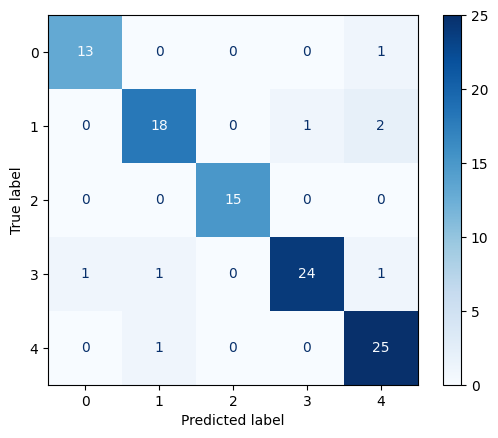

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm_report = metrics.classification_report(y_test,y_pred)
print(cm)
print(cm_report)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(colorbar=True, cmap='Blues')

### Randomforest Classifier

In [82]:
### Random Forest Model
randomForest_model = RandomForestClassifier(n_estimators=50, random_state=1,n_jobs=-1)
randomForest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=1)

In [83]:
y_pred = randomForest_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8737864077669902


[[10  2  0  0  2]
 [ 0 19  0  2  0]
 [ 0  0 15  0  0]
 [ 0  3  0 24  0]
 [ 0  3  0  1 22]]
                   precision    recall  f1-score   support

       Complaints       1.00      0.71      0.83        14
  General_request       0.70      0.90      0.79        21
   Order_requests       1.00      1.00      1.00        15
Product_Enquiries       0.89      0.89      0.89        27
Technical_Support       0.92      0.85      0.88        26

         accuracy                           0.87       103
        macro avg       0.90      0.87      0.88       103
     weighted avg       0.89      0.87      0.88       103


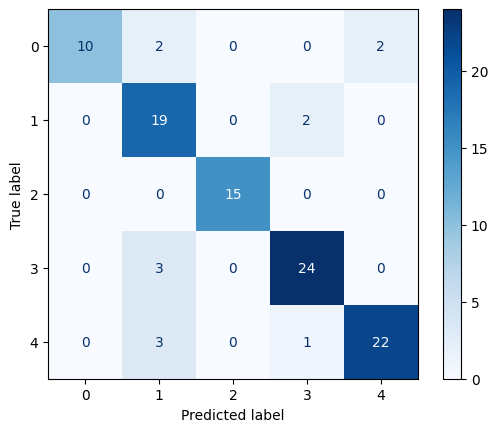

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm_report = metrics.classification_report(y_test,y_pred)
print(cm)
print(cm_report)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(colorbar=True, cmap='Blues')

## Save the trained models

In [22]:
import joblib

In [23]:
joblib.dump(svm_clf,"svm_model.pkl")

['svm_model.pkl']

In [24]:
joblib.dump(vectorizer,"vectorizer.pkl")

['vectorizer.pkl']

In [25]:
vectorizer.transform(["hi I am umair"])

<1x2654 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>